<a href="https://colab.research.google.com/github/heejjj/Image_Processing_Kor_Univ/blob/Kor_Univ/0513_encoder_decoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

제너레이트 모델
오토인코더
비지도학습에서 시작

이미지를
잠재영역에 넣음 (잠재영역으로 가는 부분을 학습)
다시 새로운 이미지로 


클래스가 없다.
비지도학습

평균 정말로 좋은 대푯값
표준편차 떨어진 정도에 대한 대푯값, 떨어진 정도의 평균

In [23]:
from tensorflow.keras.datasets import mnist,fashion_mnist
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense,Flatten,Input

import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler # 스케일러

import matplotlib.pyplot as plt


In [3]:
#스케일러사용법
x=np.array([1,2,3]).reshape(-1,1)

sc = StandardScaler()
sc.fit_transform(x)

mm = MinMaxScaler()
mm.fit_transform(x)

rb= RobustScaler()
rb.fit_transform(x)

array([[-1.],
       [ 0.],
       [ 1.]])

In [4]:
(X_train,_),(X_test,_) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [5]:
def minmaxscaler(x):
    return (x-np.min(x))/(np.max(x)-np.min(x))

In [6]:
def standardscaler(x):
    return (x-np.mean(x))/(np.std(x))

In [7]:
def robust(x):
    return (x-np.percentile(x,50))/(np.percentile(x,75)-np.percentile(x,25))

In [8]:
standardscaler(x)

array([[-1.22474487],
       [ 0.        ],
       [ 1.22474487]])

In [9]:
minmaxscaler(x)

array([[0. ],
       [0.5],
       [1. ]])

In [10]:
robust(x)

array([[-1.],
       [ 0.],
       [ 1.]])

변수가 2개이상인게 거의없다.
산포도를 나타나는 산포

공분산 한객체에서 발생된 변수
두변수의 떨어진 정도

(X1-X1_hat)(X2-X2_hat)
 σ1 σ2
 
빈도수
 빈도수 히스토그램

박스플롯
25% ~ 75% 그외는 이상치

In [11]:
X_train.shape

(60000, 28, 28)

In [12]:
X_train = X_train.reshape(-1,np.prod(X_train.shape[1:]))
X_test = X_test.reshape(-1,(X_test.shape[1]*X_test.shape[2]))
X_train.shape,X_test.shape

#쫙펴준행위

((60000, 784), (10000, 784))

인코딩 된 부분 디코딩 된 부분
잠재공간으로부터 원래형태로 표현되어야 한다.

GAN이라는 생성모델
서로경쟁해서 로스줄임

#잠재공간 이해를 위해서 함수형태로 진행
latent_dim = 32
input_img = Input(shape=X_train.shape[1:])
encoded = Dense(latent_dim)(input_img) #인코딩이미지로
decoded = Dense(X_train.shape[1:])(encoded) 



#잠재공간 이해를 위해서 함수형태로 진행
latent_dim = 32
input_img = Input(shape=X_train.shape[1:])
encoded = Dense(latent_dim)(input_img) #인코딩이미지로


위의 말과 같은 말
model =Sequential(
    [
        Dense(32,input_shape=X_train.shape[1:])
    ]
)

28*28이 784로 그것을 인코더로 32개만듬.
그것을 디코드해서표현
디코드는 32개가 784로 바꿈


##Hyperbolic Tangent, tanh
-쌍곡선 함수, 삼각함수는 단위원 그래프를 매개변수로 표시할 때 나오지만, 쌍곡선 함수는 표준 쌍곡선을 매개변수로 표시할때 나온다는 특징이 있음 

- 시그모이드 함수를 일부보완, 출력값의 범위가 시그모이드(0~1), 하이퍼볼릭탄젠트는 (-1~1사이)값 출력, 중앙값 0

# https://gooopy.tistory.com/54

In [21]:
#하이퍼블릭 탄젠트

def tanh(x):
    return(np.exp(x)-np.exp(-x))/(np.exp(x)+np.exp(-x))

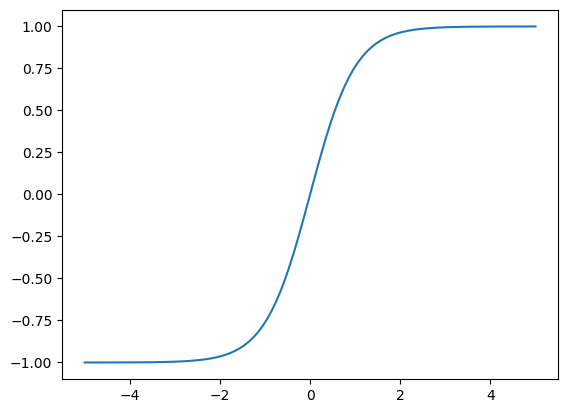

In [24]:
x=np.linspace(-5,5,100)
y=tanh(x)
plt.plot(x,y)

In [ ]:
#미분하면 최대값,최소값

In [26]:
#잠재공간 이해를 위해서 함수형태로 진행
#시그모이드 0,1  0~100의 up,down 처음부르는값 50.확률은 똑같다.정보에서는 50이 중요.
#조건부확률 가장확률이 높은 값. 나는 특별하지 않다. maximum likelyhood estimation.
#1/x * 1/(n-x)  미분해서 0으로두면 최소,최대값 x(n-x) =>2x-n=0   x=2/n
#스케일링을 통하여 밑에 모델이 잘적용되게 만듦.
latent_dim = 32

X_train = (X_train/127.5)-1
X_test = (X_test/127.5)-1

input_img = Input(shape=X_train.shape[1:])
encoded = Dense(latent_dim,activation='relu')(input_img) #인코딩이미지로
decoded = Dense(X_train.shape[1],activation='tanh')(encoded) 
ae = Model(input_img,decoded)#autoencoder

In [29]:
ae.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_2 (Dense)             (None, 32)                25120     
                                                                 
 dense_3 (Dense)             (None, 784)               25872     
                                                                 
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


In [30]:
np.max(X_train[0])

-0.9921568627450981

In [ ]:
#액티베이션함수가 없다  MSE로평가.

In [31]:
#ae.compile(optimizer='adam',loss='mean_squared_error')
ae.compile(optimizer='adam',loss='binary_crossentropy')
#ae.compile(optimizer='adam',loss='categorical_crossentropy') #잘못되는 것을 보여줌

In [32]:
#진품과 가짜를 전시 좌표를 표시해서 가짜의 모습을 만듦
#x,y가 같은 값.
ae.fit(X_train,X_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: -15.4140
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: -15.5143
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: -15.5143
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: -15.5143
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: -15.5143


In [33]:
import matplotlib.pyplot as plt

In [34]:
decoder_layer = ae

In [35]:
X_test[0]

array([-1.00784314, -1.00784314, -1.00784314, -1.00784314, -1.00784314,
       -1.00784314, -1.00784314, -1.00784314, -1.00784314, -1.00784314,
       -1.00784314, -1.00784314, -1.00784314, -1.00784314, -1.00784314,
       -1.00784314, -1.00784314, -1.00784314, -1.00784314, -1.00784314,
       -1.00784314, -1.00784314, -1.00784314, -1.00784314, -1.00784314,
       -1.00784314, -1.00784314, -1.00784314, -1.00784314, -1.00784314,
       -1.00784314, -1.00784314, -1.00784314, -1.00784314, -1.00784314,
       -1.00784314, -1.00784314, -1.00784314, -1.00784314, -1.00784314,
       -1.00784314, -1.00784314, -1.00784314, -1.00784314, -1.00784314,
       -1.00784314, -1.00784314, -1.00784314, -1.00784314, -1.00784314,
       -1.00784314, -1.00784314, -1.00784314, -1.00784314, -1.00784314,
       -1.00784314, -1.00784314, -1.00784314, -1.00784314, -1.00784314,
       -1.00784314, -1.00784314, -1.00784314, -1.00784314, -1.00784314,
       -1.00784314, -1.00784314, -1.00784314, -1.00784314, -1.00

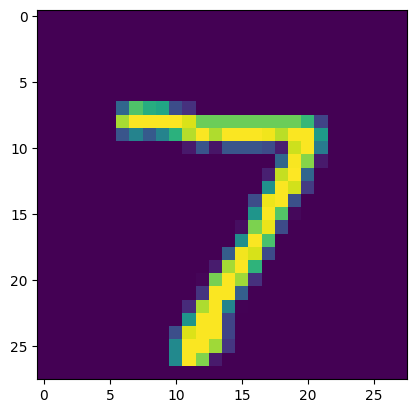

In [36]:
plt.imshow(X_test[0].reshape(28,28))

In [39]:
encoded1 = np.dot((X_test[[0]]),ae.layers[1].get_weights()[0])+ ae.layers[1].get_weights()[1]

In [40]:
ae.layers[1].get_weights()[0].shape

(784, 32)

In [41]:
encoded1.shape

(1, 32)

In [42]:
decoded1 = np.dot(encoded1, ae.layers[-1].get_weights()[0])+ae.layers[-1].get_weights()[1]

In [43]:
decoded1.shape

(1, 784)

In [44]:
decoded1 = decoded1.reshape(28,28)

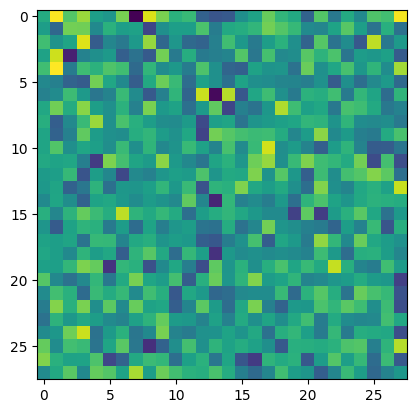

In [45]:
plt.imshow(decoded1)

In [47]:
encoded1.shape

(1, 32)

In [46]:
decode_layer = ae.layers[-1]

In [49]:
decode_model = Model(Input(shape=(32,)),decode_layer)

ValueError: ignored

In [50]:
x=np.arange(1,100)
n=100
y=x*(n-x)

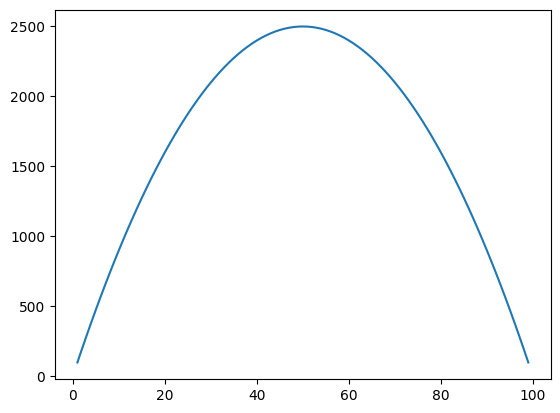

In [51]:
plt.plot(x,y)


sigmoid 미분 sig(1-sig)


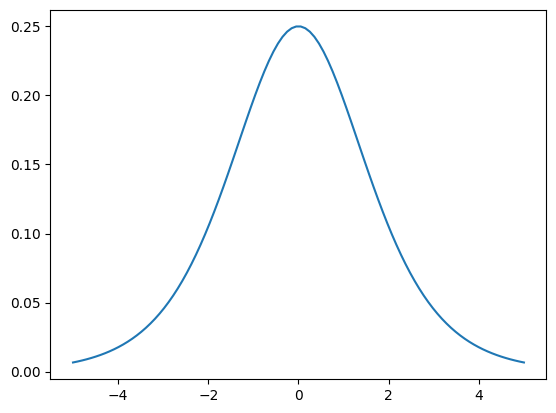

In [ ]:
x = np.linspace(-5,5,100)
sig = lambda x : 1/(1+np.exp(-x))

y = sig(x)*(1-sig(x))
plt.plot(x,y)

#데코레이터
#코딩을 잘해야 한다.
#class 현실에서는 많이 씀.
@qwe가 데코레이터
@qwe
def asd(x):
    return xax

In [52]:
(X_train,_),(X_test,_) =fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [53]:
def a_func():
    print ('a function')
def b_func():
    print('b function')

In [54]:
a_func()

a function


In [55]:
b_func()

b function


In [56]:
def another_func(func):
    return b_func()

In [57]:
@another_func
def a_func():
    print('a function')

b function


In [58]:
another_func(a_func)

b function


In [ ]:
#앞으로는 속도도 생각하고 만들어야 함.
#카멜케이스와 스네이크케이스

In [59]:
'abc_def' #리스르토 먼저만듦
'abc_def'.split('_') #['abc', 'def']

[word.capitalize() for word in 'abc_def'.split('_')]  #['Abc', 'Def']

''.join([word.capitalize() for word in 'abc_def'.split('_')]) #'AbcDef'


'AbcDef'

In [60]:
def camelcase(x):
    return ''.join([word.capitalize() for word in x.split('_')]) 

In [61]:
camelcase("abcd_efg_hi")

'AbcdEfgHi'

In [62]:
x = ['abc_def','beautiful_girl','gentle_man']

In [63]:
camelcase(x) #에러가 난다. 하나 하나씩 뽑아야 함.

AttributeError: ignored

In [64]:
def mapper(func):
    def inner(list_obj):
        return [func(li) for li in list_obj]
    return inner    
        

In [65]:
@mapper
def camelcase(x):
    return ''.join([word.capitalize() for word in x.split('_')]) 

In [66]:
camelcase(x)

['AbcDef', 'BeautifulGirl', 'GentleMan']

In [ ]:
#디버깅할 때 많이 씀.
#재귀함수 쓸 때
#피보나치수열은 재귀함수로 사용하면 힘들다.

In [67]:
# 시그모이드와 연관있다.
def fibo(n):
    if n <=1:
        return 1
    else:
        return fibo(n-1)+fibo(n-2)

In [68]:
fibo(10)

89

In [69]:
for n in range(1,30):
    print(f'{n} =======>{fibo(n)}')

1 =======>1
2 =======>2
3 =======>3
4 =======>5
5 =======>8
6 =======>13
7 =======>21
8 =======>34
9 =======>55
10 =======>89
11 =======>144
12 =======>233
13 =======>377
14 =======>610
15 =======>987
16 =======>1597
17 =======>2584
18 =======>4181
19 =======>6765
20 =======>10946
21 =======>17711
22 =======>28657
23 =======>46368
24 =======>75025
25 =======>121393
26 =======>196418
27 =======>317811
28 =======>514229
29 =======>832040


In [70]:
import functools
dir(functools)
#lru_cahce사용

['GenericAlias',
 'RLock',
 'WRAPPER_ASSIGNMENTS',
 'WRAPPER_UPDATES',
 '_CacheInfo',
 '_HashedSeq',
 '_NOT_FOUND',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_c3_merge',
 '_c3_mro',
 '_compose_mro',
 '_convert',
 '_find_impl',
 '_ge_from_gt',
 '_ge_from_le',
 '_ge_from_lt',
 '_gt_from_ge',
 '_gt_from_le',
 '_gt_from_lt',
 '_initial_missing',
 '_le_from_ge',
 '_le_from_gt',
 '_le_from_lt',
 '_lru_cache_wrapper',
 '_lt_from_ge',
 '_lt_from_gt',
 '_lt_from_le',
 '_make_key',
 '_unwrap_partial',
 'cache',
 'cached_property',
 'cmp_to_key',
 'get_cache_token',
 'lru_cache',
 'namedtuple',
 'partial',
 'partialmethod',
 'recursive_repr',
 'reduce',
 'singledispatch',
 'singledispatchmethod',
 'total_ordering',
 'update_wrapper',
 'wraps']

In [71]:
from functools  import lru_cache #최근에 사용한 캐시 사용.

In [72]:
#굉장히 빨라짐.
@lru_cache(maxsize=5)
def fibo(n):
    if n <=1:
        return 1
    else:
        return fibo(n-1)+fibo(n-2)

In [73]:
for n in range(1,100):
    print(f'{n} =======>{fibo(n)}')

1 =======>1
2 =======>2
3 =======>3
4 =======>5
5 =======>8
6 =======>13
7 =======>21
8 =======>34
9 =======>55
10 =======>89
11 =======>144
12 =======>233
13 =======>377
14 =======>610
15 =======>987
16 =======>1597
17 =======>2584
18 =======>4181
19 =======>6765
20 =======>10946
21 =======>17711
22 =======>28657
23 =======>46368
24 =======>75025
25 =======>121393
26 =======>196418
27 =======>317811
28 =======>514229
29 =======>832040
30 =======>1346269
31 =======>2178309
32 =======>3524578
33 =======>5702887
34 =======>9227465
35 =======>14930352
36 =======>24157817
37 =======>39088169
38 =======>63245986
39 =======>102334155
40 =======>165580141
41 =======>267914296
42 =======>433494437
43 =======>701408733
44 =======>1134903170
45 =======>1836311903
46 =======>2971215073
47 =======>4807526976
48 =======>7778742049
49 =======>12586269025
50 =======>20365011074
51 =======>32951280099
52 =======>53316291173
53 =======>86267571272
54 =======>139583862445
55 =======>225851433717
56 ====

클래스를 사용하는게 좋다.
클래스는 만든 것들을 상속할 수 있다.


어떻게하면 더 빨리 하는가


파이썬은 쓰레딩 지원 안됨 
캐싱,씽크에 유리
멀티프로세싱으로 써라

In [74]:
(X_train,_),(X_test,_) =fashion_mnist.load_data()
X_train = X_train.reshape(-1,np.prod(X_train.shape[1:]))
X_test = X_test.reshape(-1,(X_test.shape[1]*X_test.shape[2]))
X_train.shape,X_test.shape

((60000, 784), (10000, 784))

In [75]:
def resh(x):
    return x.reshape(-1,np.prod(x.shape[1:]))

In [76]:
(X_train,_),(X_test,_) = fashion_mnist.load_data()
(resh(X_train)).shape

(60000, 784)

In [77]:
filepath='./checkpoint/'
checkpoint = ModelCheckpoint(
    filepath,
    monitor = 'val_loss',
    verbose = 0,
    save_best_only = True,
    save_weights_only = False,
    mode = 'auto',
    save_freq='epoch',
    options=None,
    initial_value_threshold=None
)

earlystopping = EarlyStopping(patience=5)
tensorboard = TensorBoard(log_dir='./logs')
callbacks = [checkpoint,earlystopping,tensorboard]

NameError: ignored

In [78]:
#잠재공간 이해를 위해서 함수형태로 진행
#시그모이드 0,1  0~100의 up,down 처음부르는값 50.확률은 똑같다.정보에서는 50이 중요.
#조건부확률 가장확률이 높은 값. 나는 특별하지 않다. maximum likelyhood estimation.
#1/x * 1/(n-x)  미분해서 0으로두면 최소,최대값 x(n-x) =>2x-n=0   x=2/n
#스케일링을 통하여 밑에 모델이 잘적용되게 만듦.
latent_dim = 32

X_train = (X_train/255.)
X_test = (X_test/255.)

input_img = Input(shape=X_train.shape[1:])
encoded = Dense(latent_dim,activation='relu')(input_img) #인코딩이미지로
decoded = Dense(X_train.shape[1],activation='sigmoid')(encoded) 
ae = Model(input_img,decoded)#autoencoder
encoder = Model(input_img,encoded)
decoder_layer = ae.layers[-1] #ae의 마지막레이어
encoded_input = Input(shape=(latent_dim))
decoder = Model(encoded_input,decoder_layer(encoded_input))
encoder.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 dense_4 (Dense)             (None, 28, 32)            928       
                                                                 
Total params: 928
Trainable params: 928
Non-trainable params: 0
_________________________________________________________________


In [79]:
decoder.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 32)]              0         
                                                                 
 dense_5 (Dense)             multiple                  924       
                                                                 
Total params: 924
Trainable params: 924
Non-trainable params: 0
_________________________________________________________________


In [80]:
X_train.shape

(60000, 28, 28)

In [81]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MeanSquaredError, BinaryCrossentropy
from tensorflow.keras.callbacks import ModelCheckpoint,TensorBoard,EarlyStopping


In [82]:
ae.compile(optimizer=Adam(learning_rate=0.001),loss=BinaryCrossentropy())

In [83]:
ae.fit(X_train,X_train, epochs=5, batch_size=64,shuffle=True, callbacks=callbacks,
      validation_data=(X_test,X_test))


NameError: ignored

In [84]:
ae.history.history.keys()

AttributeError: ignored

In [ ]:
#사용자정의함수 콜백

In [ ]:
#텐서보드
#텐서보드 파이토치도 띄울수있다.
#콘다로 새로 봐야됨 tensorboard --logdir=./logs

In [91]:
encoded_img = encoder.predict(X_test)
decoded_img = decoder.predict(encoded_img)

313/313 [==============================] - 1s 1ms/step


ValueError: ignored

In [ ]:
#latent이미지가 2개인 상태를 보는 것도 중요하다.

In [92]:
decoded_img[0].reshape(28,28)

NameError: ignored

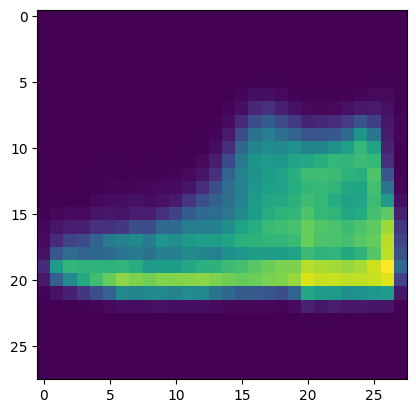

In [ ]:
plt.imshow(decoded_img[0].reshape(28,28))

In [ ]:
encoder.summary()

Model: "model_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_13 (InputLayer)       [(None, 784)]             0         
                                                                 
 dense_12 (Dense)            (None, 32)                25120     
                                                                 
Total params: 25,120
Trainable params: 25,120
Non-trainable params: 0
_________________________________________________________________


In [ ]:
decoder.summary()

Model: "model_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_14 (InputLayer)       [(None, 32)]              0         
                                                                 
 dense_13 (Dense)            (None, 784)               25872     
                                                                 
Total params: 25,872
Trainable params: 25,872
Non-trainable params: 0
_________________________________________________________________


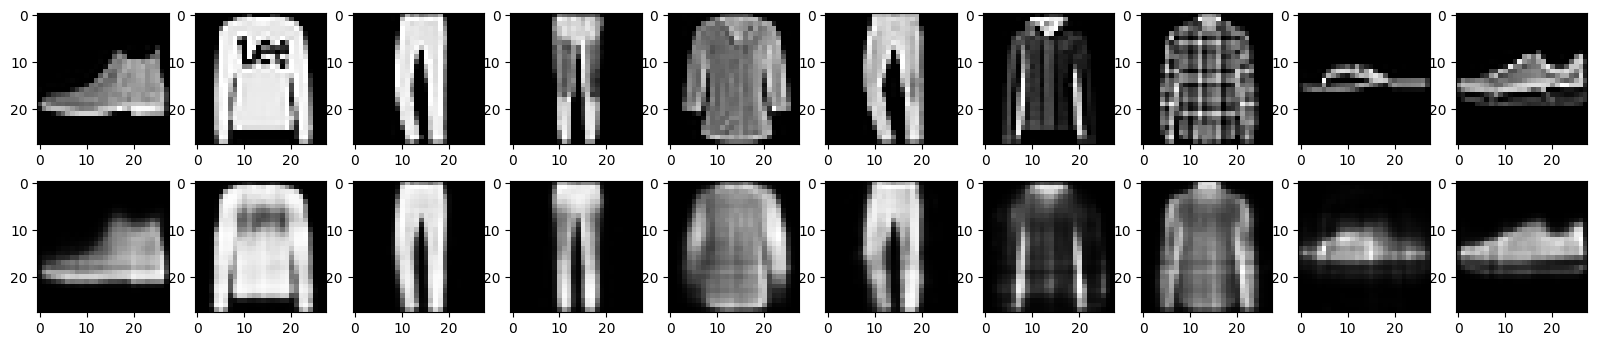

In [ ]:
n= 10
plt.figure(figsize=(20,4))
for i in range(n):
    ax = plt.subplot(2,n,i+1)
    plt.imshow(X_test[i].reshape(28,28))
    plt.gray()
    
    ax = plt.subplot(2,n,i+1+n)
    plt.imshow(decoded_img[i].reshape(28,28))
    

In [ ]:
(X_train,_),(X_test,_) =mnist.load_data()

In [ ]:
X_train.shape #60000,28,28,1로 바꿔야함. reshape, np.newaxis


(60000, 28, 28)

In [ ]:
X_train = X_train.reshape(-1,28,28,1)
X_train = X_train/(np.max(X_train)/2)-1
X_test = X_test.reshape(-1,28,28,1)
X_test = X_test/(np.max(X_test)/2)-1


In [ ]:
X_test.shape

(10000, 28, 28, 1)

In [ ]:
x = np.random.randn(100,28,28)
x[:,:,:,np.newaxis].shape

(100, 28, 28, 1)

In [ ]:
x = np.random.randn(100,28,28)
x[:,np.newaxis,:,:].shape

(100, 1, 28, 28)

In [ ]:
x = np.random.randn(100,3)
np.dot(x,np.random.randn(3,1000)).shape

In [ ]:
x = np.random.randn(100,28,28)
np.dot(x,np.random.randn(1,100)).shape

In [ ]:
#컨볼루션 레이어 특징의 값을 가지고 넘어감 크기를 줄임.
# 컬럼을 늘리면, 많은 가능성을 알 수 있다.
#

In [85]:
from tensorflow.keras.layers import Conv2D,Conv2DTranspose,Input,BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.layers import LeakyReLU,Reshape,Lambda

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
Total params: 320
Trainable params: 320
Non-trainable params: 0
_________________________________________________________________


In [ ]:
input_img = Input(shape=(X_train.shape[1:]))
latent_dim=2

x = Conv2D(32,(3,3),padding='same')(input_img) 
x = BatchNormalization()(x)
x = LeakyReLU()(x) #28,28,32

x = Conv2D(64,(3,3),padding='same')(input_img) 
x = BatchNormalization()(x)
x = LeakyReLU()(x) #28,28,32

x = Conv2D(64,(3,3), strides=2, padding='same')(x)  
x = BatchNormalization()(x)
x = LeakyReLU()(x) #14,14,64

x = Conv2D(64,(3,3),strides=2,padding='same')(x) 
x = BatchNormalization()(x)
x = LeakyReLU()(x) #7,7,64

x = Flatten()(x)

x = Dense(latent_dim)(x)
##########여기까지가 인코더


#############디코더 시작   모형을 바꿔줘야함.
x = Dense(7*7*64)(x)
x = Reshape((7,7,64))(x)  #reshape부분


x = Conv2DTranspose(64,(3,3),padding='same')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)

x = Conv2DTranspose(64,(3,3),strides=2,padding='same')(x) 
x = BatchNormalization()(x)
x = LeakyReLU()(x) #14,14,64


x = Conv2DTranspose(64,(3,3),strides=2,padding='same')(x) 
x = BatchNormalization()(x)
x = LeakyReLU()(x) #14,14,64

x = Conv2DTranspose(32,(3,3),padding='same')(x) 
x = BatchNormalization()(x)
x = LeakyReLU()(x)  

out = Conv2DTranspose(1,(3,3),padding='same',activation='tanh')(x)

model = Model(input_img,out)


In [ ]:
model.summary()

Model: "model_44"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_44 (InputLayer)       [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_73 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 batch_normalization_75 (Bat  (None, 28, 28, 32)       128       
 chNormalization)                                                
                                                                 
 leaky_re_lu_75 (LeakyReLU)  (None, 28, 28, 32)        0         
                                                                 
 conv2d_74 (Conv2D)          (None, 14, 14, 64)        18496     
                                                                 
 batch_normalization_76 (Bat  (None, 14, 14, 64)       256       
 chNormalization)                                         

In [ ]:
#loss mse,crossentorpy
#cost function
#엔트로피 확률에 대한 밀도의 차이
#베르누이 시행

#정보이론
#특이한것 정보가 중요
# 1/P(x) 어떤 확률에 대해서 가치가 높은 것


In [ ]:
model.compile(optimizer='adam',loss='mse')

In [ ]:
callbacks=EarlyStopping(patience=10)
model.fit(X_train,X_train,epochs=2,callbacks=callbacks,validation_data=(X_test,X_test))
    

Epoch 1/2
1875/1875 [==============================] - 287s 152ms/step - loss: 0.2115 - val_loss: 0.1934
Epoch 2/2
1875/1875 [==============================] - 281s 150ms/step - loss: 0.1904 - val_loss: 0.1871


In [ ]:
model.layers[:15]

In [ ]:
encoder = Sequential(
     model.layers[:15]    
)

In [ ]:
decoder = Sequential(
    model.layers[15:]
)

In [ ]:
encoder.predict(X_test).shape

313/313 [==============================] - 8s 24ms/step


(10000, 7, 7, 64)

In [ ]:
encoded = encoder.predict(X_test)
decoded = decoder.predict(encoded)

313/313 [==============================] - 13s 42ms/step


In [ ]:
encoded.shape

(10000, 7, 7, 64)

In [ ]:
decoder.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_131 (Ba  (None, 7, 7, 64)         256       
 tchNormalization)                                               
                                                                 
 leaky_re_lu_131 (LeakyReLU)  (None, 7, 7, 64)         0         
                                                                 
 conv2d_transpose_59 (Conv2D  (None, 14, 14, 64)       36928     
 Transpose)                                                      
                                                                 
 batch_normalization_132 (Ba  (None, 14, 14, 64)       256       
 tchNormalization)                                               
                                                                 
 leaky_re_lu_132 (LeakyReLU)  (None, 14, 14, 64)       0         
                                                     

In [ ]:
#노이즈제거

In [ ]:
choiced = np.random.choice(np.arange(len(X_test)), n)
X_test[choiced[0]].shape

(28, 28, 1)

In [ ]:
def img_draw(x,n=10):
    
    plt.figure(figsize=(20,4))
    choiced = np.random.choice(np.arange(len(X_test)), n)
    encoded = encoder.predict(x[choiced])
    decoded = decoder.predict(encoded)
    
    for i in range(n):
        ax = plt.subplot(2,n,i+1)
        plt.imshow(x[choiced[i]])
        plt.gray()

        ax = plt.subplot(2,n,i+1+n)
        plt.imshow(decoded[i])
        plt.gray()
    plt.show()


In [ ]:
decoded[1].shape

(28, 28, 1)

In [ ]:

#cX_test[1].shape

(28, 28, 1)

In [ ]:
img_draw(3)

TypeError: 'int' object is not subscriptable

<Figure size 2000x400 with 0 Axes>

In [37]:
#이미지 잠재공간 찍는 곳
#x값 -1~1사이에서 들어감 

#y값 받아옴, 위에서 받아왔어야 함 
#def plot_xy(x): 
(_, y_train),(_, y_test) = mnist.load_data()
  

In [ ]:
latent = encoder.predict(X_test)

In [89]:
x = latent[:100][:,0]
y = latent[:100][:,1]

NameError: ignored

ValueError: ignored

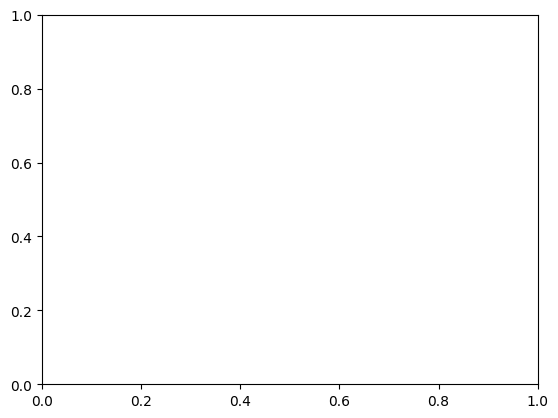

In [90]:
plt.figsize(figsize =(15,13))

plt.scatter(x,y, c=y_test, cmap= "Paired") #그라데이션 말고, 여러가 나눠져있는거 써야 좋을 듯
#현재 컬러는 0-8 9개 
plt.colorbar()
plt.show()



In [38]:
#label과 함께 색깔로 찍어주기 
#latent와 y_test는 쌍임




In [87]:
x = np.random.choice(np.linspace(-1,1, 100), size=(1,28,28,1))
x

array([[[[-0.6969697 ],
         [-0.43434343],
         [ 0.93939394],
         [-0.01010101],
         [-0.75757576],
         [-0.8989899 ],
         [-0.49494949],
         [-0.05050505],
         [-0.23232323],
         [-0.55555556],
         [-0.85858586],
         [ 0.95959596],
         [ 0.6969697 ],
         [-0.55555556],
         [-0.03030303],
         [-0.47474747],
         [ 0.43434343],
         [ 0.6969697 ],
         [-0.07070707],
         [ 0.6969697 ],
         [ 0.6969697 ],
         [-0.7979798 ],
         [-0.45454545],
         [-0.13131313],
         [ 0.51515152],
         [ 0.8989899 ],
         [ 0.37373737],
         [-0.49494949]],

        [[-0.21212121],
         [-0.95959596],
         [ 0.27272727],
         [ 0.41414141],
         [-0.77777778],
         [ 0.67676768],
         [-0.41414141],
         [-0.71717172],
         [-0.81818182],
         [-0.93939394],
         [ 0.71717172],
         [ 0.29292929],
         [ 0.17171717],
         [ 0.6

In [19]:
x = encoder.predict(x)

array([[[[ 0.63636364],
         [-0.47474747],
         [-0.29292929],
         [-0.75757576],
         [ 0.37373737],
         [ 0.87878788],
         [ 0.51515152],
         [ 0.43434343],
         [-0.77777778],
         [-0.91919192],
         [-0.8989899 ],
         [ 0.49494949],
         [-0.31313131],
         [ 0.03030303],
         [-0.55555556],
         [ 0.81818182],
         [-0.07070707],
         [-0.35353535],
         [ 0.37373737],
         [-0.25252525],
         [ 0.25252525],
         [-0.97979798],
         [ 0.21212121],
         [ 0.47474747],
         [ 0.57575758],
         [ 0.33333333],
         [-0.95959596],
         [-0.81818182]],

        [[-0.95959596],
         [ 0.43434343],
         [-0.31313131],
         [-0.65656566],
         [ 0.8989899 ],
         [ 0.41414141],
         [ 0.55555556],
         [-0.25252525],
         [ 0.81818182],
         [ 0.35353535],
         [-0.25252525],
         [-0.09090909],
         [ 0.11111111],
         [ 0.6

In [28]:
x = encoder.predict(x)
x[:, 0]

NameError: ignored

In [27]:
np.max(x)

5.0

In [86]:
np.min(x) #-값이 있으면 안되므로 min값 확인 

UFuncTypeError: ignored